 `(Mohammad Reza Amiri 9926040)`
 `(Amir Hossein Ahmadi Ashtiani 9923501)`
 `(Mohammad Mahdi Norouzi 9923085)`

In [218]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [219]:
%load_ext autoreload
%autoreload 2

import step_perceptron

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [220]:
# Load the dataset
cancer_data = load_breast_cancer()

# Features (input data)
X = cancer_data.data

# Labels (output data)
y = cancer_data.target

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (569, 30)
y shape:  (569,)


### Explore Data:
The input data has a shape of `(569, 30)`, meaning there are 569 samples, each with 30 features.  
To create a perceptron, we need 30 weights, one for each feature.

### Initialization:
Determine the input size for the perceptron (which is 30 in this case) and initialize the weights and bias.

### Forward Pass:
Calculate the dot product between the input data and the weights, then add the bias.  
Pass the result through a sigmoid function to produce the output.

### Backward Pass:
First, we need to calculate the loss. A good option is to use the Mean Squared Error (MSE) loss function:

$$
\text{loss} = \frac{1}{2} (y_{\text{pred}} - y_{\text{label}})^2
$$

To update the weights and bias, we need the gradients of the loss with respect to the weights and bias. While using the chain rule is one option, a more efficient approach is to utilize a computational graph. The figure below illustrates this process.


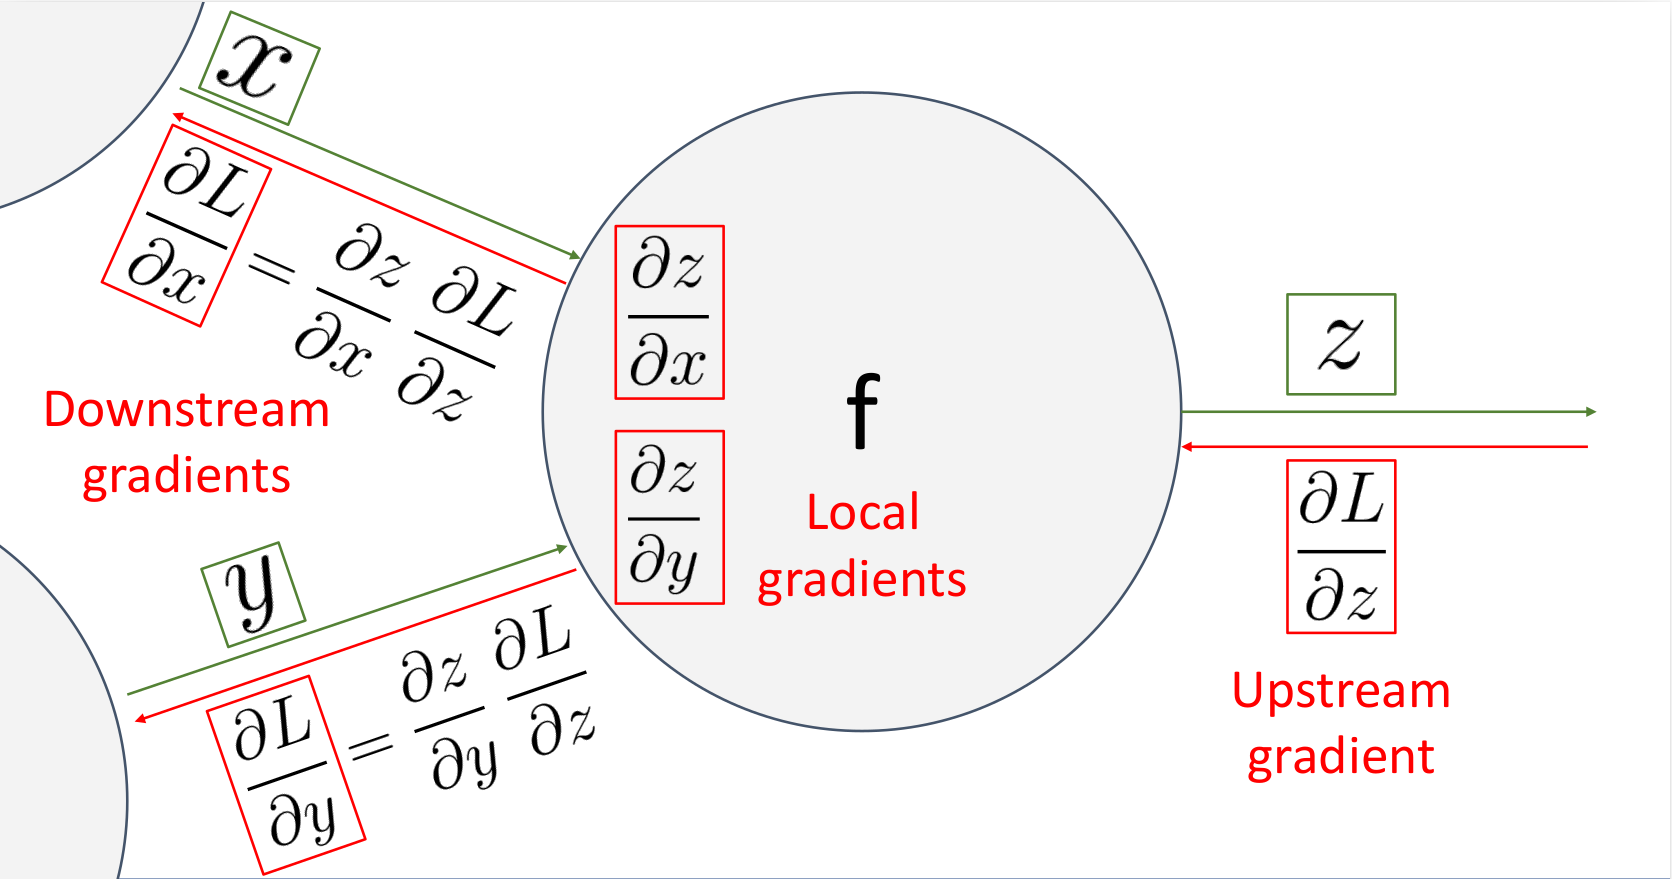

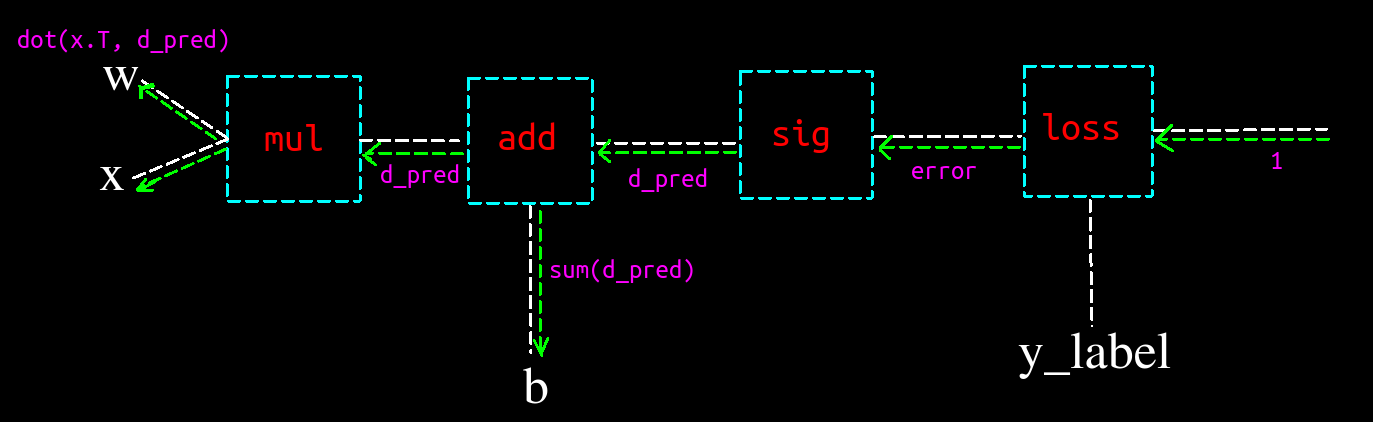

## sigmoid activation

In [221]:
class Perceptron:
    def __init__(self, input_size=30, lr=0.01) -> None:
        self.input_size = input_size
        self.threshold = np.random.rand()
        self.w = np.random.rand(self.input_size, 1)
        self.lr = lr
        self.losses = []  # List to store loss at each epoch
        self.train_accuracies = []  # Track training accuracy
        self.test_accuracies = []  # Track test accuracy

    def forward(self, x):
        # Linear combination
        linear_output = np.dot(x, self.w) + self.threshold
        return self.sigmoid(linear_output)

    def sigmoid(self, out):
        return 1 / (1 + np.exp(-out))

    def sigmoid_derivative(self, out):
        # Derivative of the sigmoid function
        return out * (1 - out)
    
    def compute_loss(self, y_true, y_pred):
        # Squared loss: (1/2) * (y_pred - y_true)^2
        loss = 0.5 * np.mean((y_pred - y_true.reshape(-1, 1)) ** 2)
        return loss
    
    def accuracy(self, x, y_true):
        y_pred = self.predict(x).flatten()
        return np.mean(y_pred == y_true)

    def backward(self, x, y_true, y_pred):
        # Compute the error
        error = y_pred - y_true.reshape(-1, 1)

        # Derivative of sigmoid (for the output layer)
        d_pred = error * self.sigmoid_derivative(y_pred)

        # Update weights and threshold (bias)
        self.w -= self.lr * np.dot(x.T, d_pred)  # Gradient w.r.t weights
        self.threshold -= self.lr * np.sum(d_pred)  # Gradient w.r.t threshold (bias)

    def train(self, x_train, y_train, x_test, y_test, epochs=100):
        for epoch in range(epochs):
            y_pred_train = self.forward(x_train)
            
            # Compute training loss and store it
            train_loss = self.compute_loss(y_train, y_pred_train)
            self.losses.append(train_loss)
            
            # Calculate accuracy for training and test data
            train_accuracy = self.accuracy(x_train, y_train)
            test_accuracy = self.accuracy(x_test, y_test)
            
            # Store accuracies
            self.train_accuracies.append(train_accuracy)
            self.test_accuracies.append(test_accuracy)
            
            # Update weights
            self.backward(x_train, y_train, y_pred_train)
    
    def predict(self, x):
        y_pred = self.forward(x)
        return (y_pred > 0.5).astype(int)  # Threshold at 0.5 to get binary output


In [222]:
# Plotting the loss and accuracy after training
def plot_loss_and_accuracy(perceptron):
    epochs = range(len(perceptron.losses))
    
    # Plot Loss
    plt.figure(figsize=(12, 5))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, perceptron.losses, label="Training Loss")
    plt.title("Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, perceptron.train_accuracies, label="Training Accuracy", color='blue')
    plt.plot(epochs, perceptron.test_accuracies, label="Test Accuracy", color='green')
    plt.title("Accuracy vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Display plots
    plt.tight_layout()
    plt.show()

In [223]:
# Normalize the data for faster convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Perceptron
perceptron1 = Perceptron(input_size=X_train.shape[1], lr=0.001)
perceptron2 = Perceptron(input_size=X_train.shape[1], lr=0.01)
perceptron3 = Perceptron(input_size=X_train.shape[1], lr=0.1)

# Train the Perceptron
perceptron1.train(X_train, y_train, X_test, y_test, epochs=50)
perceptron2.train(X_train, y_train, X_test, y_test, epochs=50)
perceptron3.train(X_train, y_train, X_test, y_test, epochs=50)

# Predict on the test set
y_pred1 = perceptron1.predict(X_test)
y_pred2 = perceptron2.predict(X_test)
y_pred3 = perceptron3.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred1.flatten() == y_test)
print(f"Accuracy (lr:0.001): {accuracy * 100:.2f}%")
accuracy = np.mean(y_pred2.flatten() == y_test)
print(f"Accuracy (lr:0.01): {accuracy * 100:.2f}%")
accuracy = np.mean(y_pred3.flatten() == y_test)
print(f"Accuracy (lr:0.1): {accuracy * 100:.2f}%")

Accuracy (lr:0.001): 8.77%
Accuracy (lr:0.01): 99.12%
Accuracy (lr:0.1): 99.12%


lr: 0.001


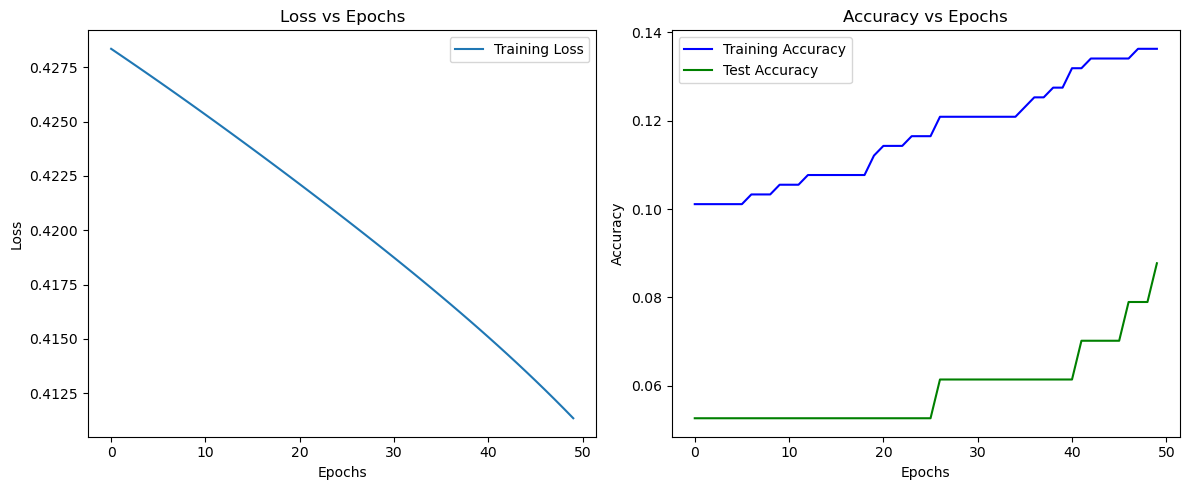

lr: 0.01


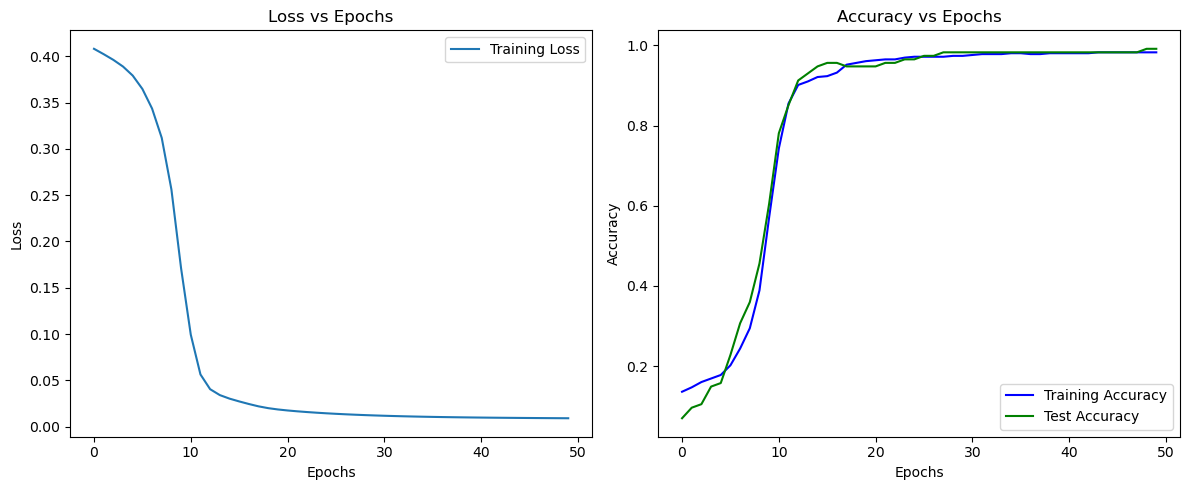

lr: 0.1


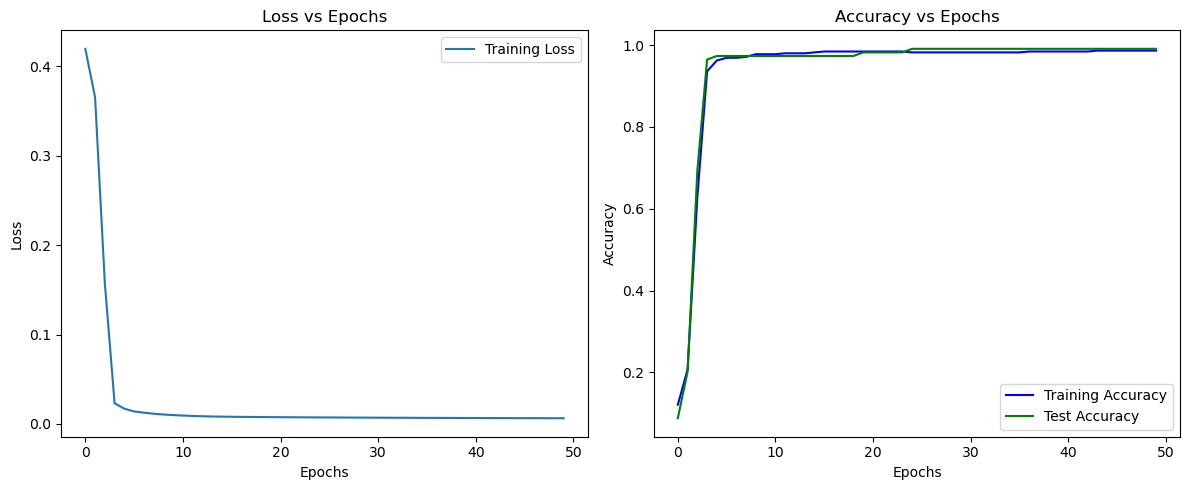

In [224]:
# Plot the loss curve
print('lr: 0.001')
plot_loss_and_accuracy(perceptron1)
print('lr: 0.01')
plot_loss_and_accuracy(perceptron2)
print('lr: 0.1')
plot_loss_and_accuracy(perceptron3)

## binary activation

In [225]:
class Perceptron:
    def __init__(self, input_size=30, lr=0.01) -> None:
        self.input_size = input_size
        self.threshold = np.random.rand()
        self.w = np.random.rand(self.input_size, 1)
        self.lr = lr
        self.losses = []  # List to store loss at each epoch
        self.train_accuracies = []  # Track training accuracy
        self.test_accuracies = []  # Track test accuracy

    def forward(self, x):
        # Linear combination
        linear_output = np.dot(x, self.w) + self.threshold
        return self.activation_function(linear_output)

    def activation_function(self, x):
        return np.where(x > 0, 1, 0)

    def compute_loss(self, y_true, y_pred):
        # Squared loss: (1/2) * (y_pred - y_true)^2
        loss = 0.5 * np.mean((y_pred - y_true.reshape(-1, 1)) ** 2)
        return loss

    def accuracy(self, x, y_true):
        y_pred = self.predict(x).flatten()
        return np.mean(y_pred == y_true)

    def backward(self, x, y_true, y_pred):
        # Compute the error
        error = y_true.reshape(-1, 1) - y_pred

        # Update weights and threshold (bias)
        self.w += self.lr * np.dot(x.T, error)  # Gradient w.r.t weights
        # Gradient w.r.t threshold (bias)
        self.threshold += self.lr * np.sum(error)

    def train(self, x_train, y_train, x_test, y_test, epochs=100):
        for epoch in range(epochs):
            y_pred_train = self.forward(x_train)

            # Compute training loss and store it
            train_loss = self.compute_loss(y_train, y_pred_train)
            self.losses.append(train_loss)

            # Calculate accuracy for training and test data
            train_accuracy = self.accuracy(x_train, y_train)
            test_accuracy = self.accuracy(x_test, y_test)

            # Store accuracies
            self.train_accuracies.append(train_accuracy)
            self.test_accuracies.append(test_accuracy)

            # Update weights
            self.backward(x_train, y_train, y_pred_train)

    def predict(self, x):
        y_pred = self.forward(x)
        return self.activation_function(y_pred).astype(int)

In [226]:
# Normalize the data for faster convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Perceptron
perceptron1 = Perceptron(lr=0.001)
perceptron2 = Perceptron(lr=0.01)
perceptron3 = Perceptron(lr=0.1)

# Train the Perceptron
perceptron1.train(X_train, y_train, X_test, y_test, epochs=50)
perceptron2.train(X_train, y_train, X_test, y_test, epochs=50)
perceptron3.train(X_train, y_train, X_test, y_test, epochs=50)

# Predict on the test set
y_pred1 = perceptron1.predict(X_test)
y_pred2 = perceptron2.predict(X_test)
y_pred3 = perceptron3.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred1.flatten() == y_test)
print(f"Accuracy (lr:0.001): {accuracy * 100:.2f}%")
accuracy = np.mean(y_pred2.flatten() == y_test)
print(f"Accuracy (lr:0.01): {accuracy * 100:.2f}%")
accuracy = np.mean(y_pred3.flatten() == y_test)
print(f"Accuracy (lr:0.1): {accuracy * 100:.2f}%")

Accuracy (lr:0.001): 96.49%
Accuracy (lr:0.01): 99.12%
Accuracy (lr:0.1): 98.25%


lr: 0.001


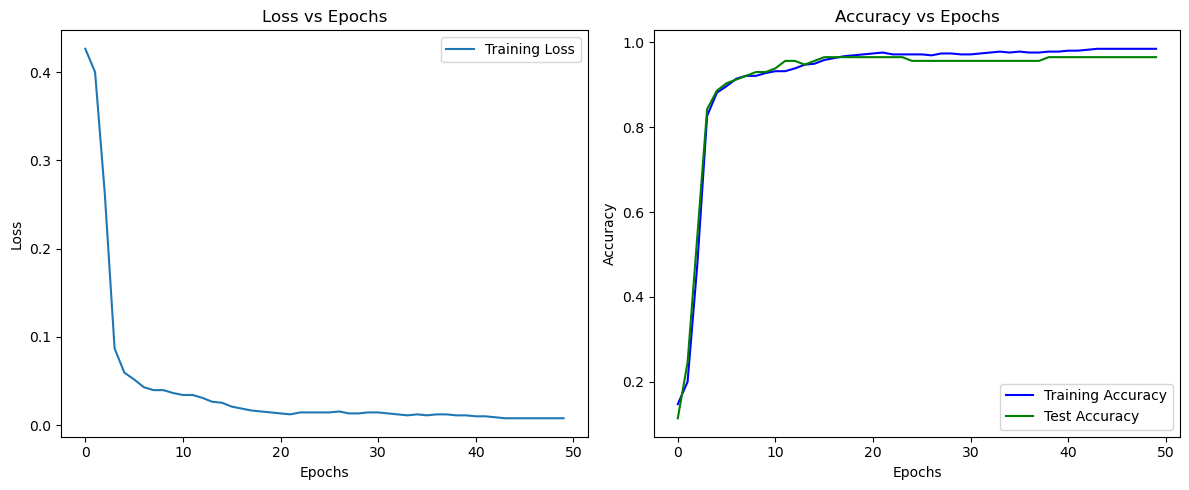

lr: 0.01


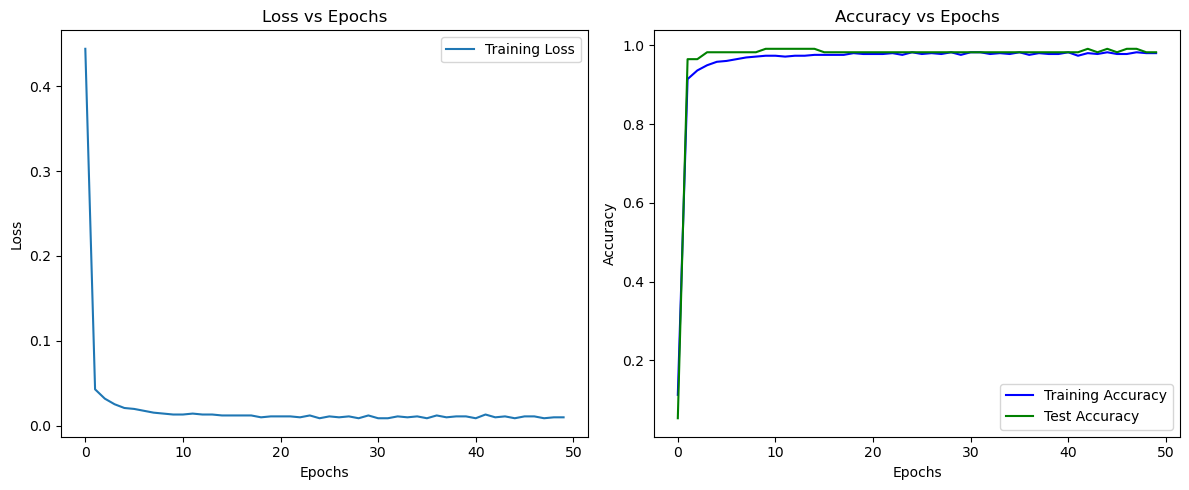

lr: 0.1


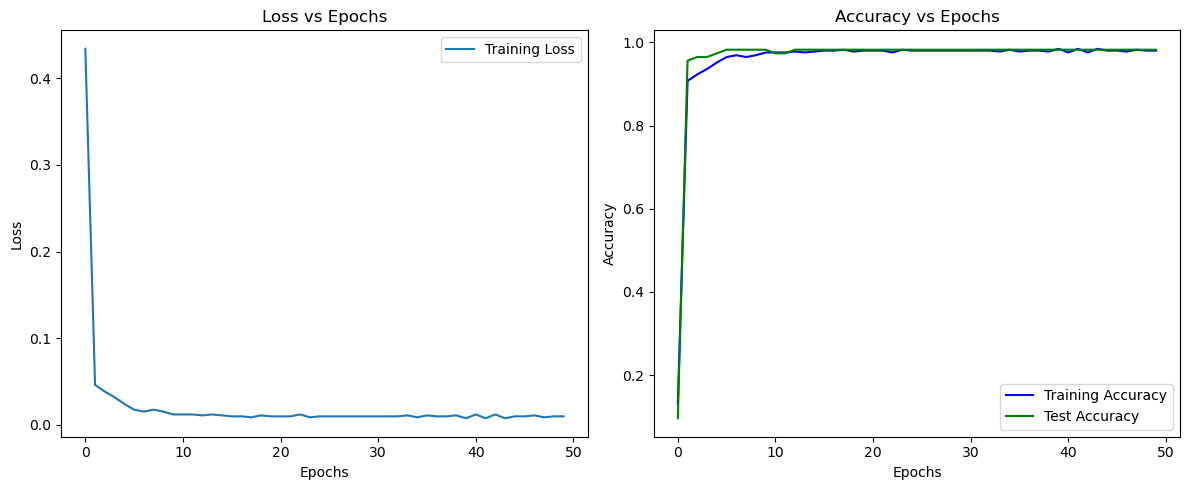

In [227]:
# Plot the loss curve
print('lr: 0.001')
plot_loss_and_accuracy(perceptron1)
print('lr: 0.01')
plot_loss_and_accuracy(perceptron2)
print('lr: 0.1')
plot_loss_and_accuracy(perceptron3)

# Practice

## 1

In [228]:
class Perceptron:
    def __init__(self, input_size=30, lr=0.01) -> None:
        self.input_size = input_size
        self.threshold = np.random.rand()
        self.w = np.random.rand(self.input_size, 1)
        self.lr = lr
        self.losses = []  # List to store loss at each epoch
        self.train_accuracies = []  # Track training accuracy
        self.test_accuracies = []  # Track test accuracy

    def forward(self, x):
        # Linear combination
        linear_output = np.dot(x, self.w)
        return self.sigmoid(linear_output)

    def sigmoid(self, out):
        return 1 / (1 + np.exp(-out))

    def sigmoid_derivative(self, out):
        # Derivative of the sigmoid function
        return out * (1 - out)
    
    def compute_loss(self, y_true, y_pred):
        # Squared loss: (1/2) * (y_pred - y_true)^2
        loss = 0.5 * np.mean((y_pred - y_true.reshape(-1, 1)) ** 2)
        return loss
    
    def accuracy(self, x, y_true):
        y_pred = self.predict(x).flatten()
        return np.mean(y_pred == y_true)

    def backward(self, x, y_true, y_pred):
        # Compute the error
        error = y_pred - y_true.reshape(-1, 1)

        # Derivative of sigmoid (for the output layer)
        d_pred = error * self.sigmoid_derivative(y_pred)

        # Update weights and threshold (bias)
        self.w -= self.lr * np.dot(x.T, d_pred)  # Gradient w.r.t weights
        # self.threshold -= self.lr * np.sum(d_pred)  # Gradient w.r.t threshold (bias)

    def train(self, x_train, y_train, x_test, y_test, epochs=100):
        for epoch in range(epochs):
            y_pred_train = self.forward(x_train)
            
            # Compute training loss and store it
            train_loss = self.compute_loss(y_train, y_pred_train)
            self.losses.append(train_loss)
            
            # Calculate accuracy for training and test data
            train_accuracy = self.accuracy(x_train, y_train)
            test_accuracy = self.accuracy(x_test, y_test)
            
            # Store accuracies
            self.train_accuracies.append(train_accuracy)
            self.test_accuracies.append(test_accuracy)
            
            # Update weights
            self.backward(x_train, y_train, y_pred_train)
    
    def predict(self, x):
        y_pred = self.forward(x)
        return (y_pred > 0.5).astype(int)  # Threshold at 0.5 to get binary output


In [229]:
# Normalize the data for faster convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = np.hstack((X_train, np.ones((X_train.shape[0],1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0],1))))

# Initialize the Perceptron
perceptron1 = Perceptron(input_size=X_train.shape[1], lr=0.01)

# Train the Perceptron
perceptron1.train(X_train, y_train, X_test, y_test, epochs=50)

# Predict on the test set
y_pred1 = perceptron1.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred1.flatten() == y_test)
print(f"Accuracy (lr:0.01): {accuracy * 100:.2f}%")

Accuracy (lr:0.01): 97.37%


## 2

<div dir="rtl">
یک پرسپترون تنها می‌تواند داده‌هایی را که به صورت خطی قابل جداسازی هستند، طبقه‌بندی کند. این مدل نمی‌تواند مسائلی را حل کند که در آن داده‌ها به صورت خطی قابل جداسازی نیستند، مانند داده‌هایی که به شکل حلقه‌های هم‌مرکز یا دایره‌ها هستند.

در تصویر ارائه شده، به نظر می‌رسد که مسئله طبقه‌بندی شامل جدا کردن نقاط داده‌ای است که داخل و خارج یک ناحیه دایره‌ای یا حلقه‌ای قرار دارند. از آنجا که این الگو به صورت خطی قابل جداسازی نیست (مثل مشکلات XOR یا الگوهای دایره‌ای)، یک پرسپترون به تنهایی قادر نخواهد بود این داده‌ها را به درستی طبقه‌بندی کند. برای حل این مسئله به مدل‌های پیشرفته‌تری نیاز است، مانند:

- **پرسپترون چند لایه (MLP)** با توابع فعال‌سازی غیرخطی (مثل ReLU یا سیگموید).
- **روش‌های کرنل** مانند ماشین‌های بردار پشتیبان (SVM) با استفاده از کرنل تابع پایه شعاعی (RBF).

این روش‌ها می‌توانند مرزهای غیرخطی را مدیریت کنند، برخلاف یک پرسپترون ساده.
</div>


## 4


#### cannot implement XOR using single Perceptron

In [230]:
# Define the training data for AND, OR, and XOR gates
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=10):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                
                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = [self.activation_function(x) for x in linear_output]
        return np.array(y_predicted)
    
def get_data(gate):
    if gate == 'AND':
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 0, 0, 1])
    elif gate == 'OR':
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 1])
    elif gate == 'XOR':
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 0])
    return X, y

def train_perceptron(gate):
    X, y = get_data(gate)
    p = Perceptron(learning_rate=0.1)
    p.fit(X, y)  # Train on the same data for simplicity
    print(f"{gate} Gate:")
    for i in range(4):
        print(f"Input: {X[i]}, Predicted: {p.predict(X[[i]])[0]}, Expected: {y[i]}")

# Train and test the perceptron for AND, OR, and XOR gates
train_perceptron('AND')
train_perceptron('OR')
train_perceptron('XOR')

print("using sigmoid Perceptron")
from main import Perceptron

def train_perceptron(gate):
    X, y = get_data(gate)
    p = Perceptron(input_size=2, lr=0.1)
    p.train(X, y, X, y, epochs=10)  # Train on the same data for simplicity
    print(f"{gate} Gate:")
    for i in range(4):
        print(f"Input: {X[i]}, Predicted: {p.predict(X[[i]])[0][0]}, Expected: {y[i]}")

# Train and test the perceptron for AND, OR, and XOR gates
train_perceptron('AND')
train_perceptron('OR')
train_perceptron('XOR')

AND Gate:
Input: [0 0], Predicted: 0, Expected: 0
Input: [0 1], Predicted: 0, Expected: 0
Input: [1 0], Predicted: 0, Expected: 0
Input: [1 1], Predicted: 1, Expected: 1
OR Gate:
Input: [0 0], Predicted: 0, Expected: 0
Input: [0 1], Predicted: 1, Expected: 1
Input: [1 0], Predicted: 1, Expected: 1
Input: [1 1], Predicted: 1, Expected: 1
XOR Gate:
Input: [0 0], Predicted: 1, Expected: 0
Input: [0 1], Predicted: 1, Expected: 1
Input: [1 0], Predicted: 0, Expected: 1
Input: [1 1], Predicted: 0, Expected: 0
using sigmoid Perceptron
AND Gate:
Input: [0 0], Predicted: 0, Expected: 0
Input: [0 1], Predicted: 0, Expected: 0
Input: [1 0], Predicted: 0, Expected: 0
Input: [1 1], Predicted: 1, Expected: 1
OR Gate:
Input: [0 0], Predicted: 0, Expected: 0
Input: [0 1], Predicted: 1, Expected: 1
Input: [1 0], Predicted: 1, Expected: 1
Input: [1 1], Predicted: 1, Expected: 1
XOR Gate:
Input: [0 0], Predicted: 0, Expected: 0
Input: [0 1], Predicted: 0, Expected: 1
Input: [1 0], Predicted: 0, Expected:

## 5

- **sepal length (cm)**: Length of the sepal.
- **sepal width (cm)**: Width of the sepal.
- **petal length (cm)**: Length of the petal.
- **petal width (cm)**: Width of the petal.
- **species**: Target variable indicating the species of the iris, which can be one of:
  - setosa
  - versicolor
  - virginica

In [231]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for better visualization
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['species'])
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Display the first few rows of the DataFrame
print(df.head())

print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


We have three classes; therefore, we must use three perceptrons. Since the output of each perceptron can be either zero or one, I created three datasets: one for the zero outputs, one for the one outputs, and one for the two outputs.


In [232]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train0 = np.where(y_train==0, 1, 0)
y_train1 = np.where(y_train==1, 1, 0)
y_train2 = np.where(y_train==2, 1, 0)

y_test0 = np.where(y_test==0, 1, 0)
y_test1 = np.where(y_test==1, 1, 0)
y_test2 = np.where(y_test==2, 1, 0)

print(y_train0)
print(y_train1)
print(y_train2)

[1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0]
[0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 1 0 0 0 1 0 0 1 0]
[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0
 0 1 1 0 0 1 0 0 1]


perceptron0: 


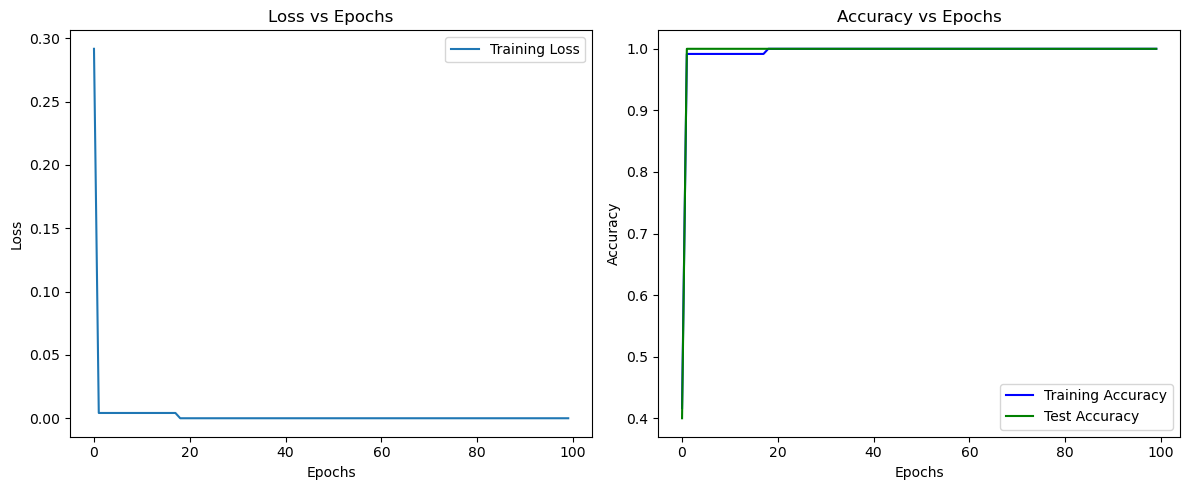

perceptron1: 


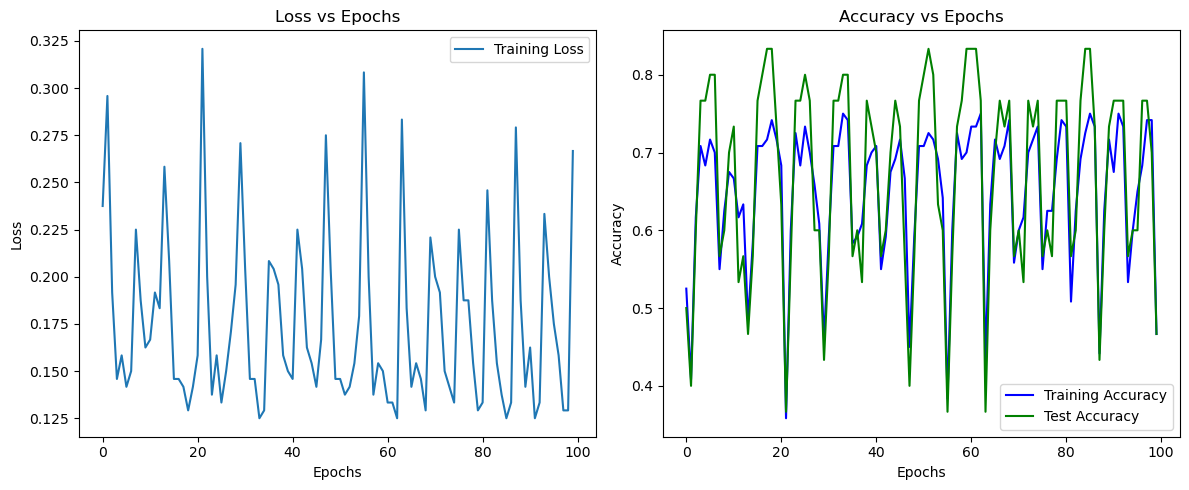

perceptron2: 


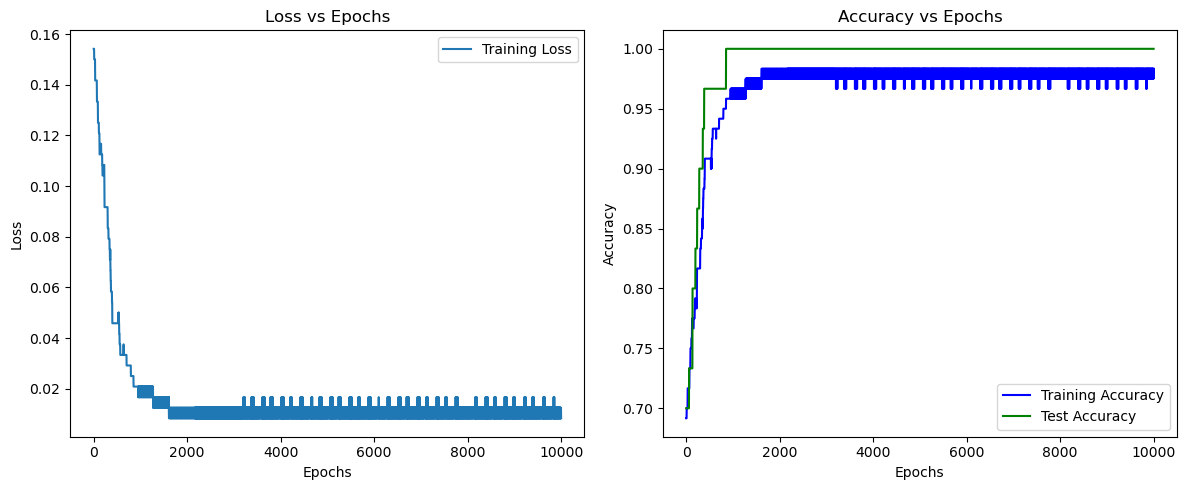

In [233]:
from step_perceptron import Perceptron, plot_loss_and_accuracy

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Perceptron model
perceptron0 = Perceptron(input_size=X_train.shape[1], lr=0.01)
perceptron0.train(X_train.copy(), y_train0, X_test.copy(), y_test0, epochs=100)

perceptron1 = Perceptron(input_size=X_train.shape[1], lr=0.5)
perceptron1.train(X_train, y_train1, X_test, y_test1, epochs=100)

perceptron2 = Perceptron(input_size=X_train.shape[1], lr=0.0001)
perceptron2.train(X_train, y_train2, X_test, y_test2, epochs=10000)

print("perceptron0: ")
plot_loss_and_accuracy(perceptron0)
print("perceptron1: ")
plot_loss_and_accuracy(perceptron1)
print("perceptron2: ")
plot_loss_and_accuracy(perceptron2)



In [234]:
num_test = y_test.shape[0]
num_correct = 0
for i in range(num_test):
    p0 = perceptron0.predict(X_test[i])
    p1 = perceptron1.predict(X_test[i])
    p2 = perceptron2.predict(X_test[i])
    if [p0, p1, p2] == [y_test0[i], y_test1[i], y_test2[i]]:
        num_correct += 1
print("accuracy: ", num_correct/num_test)

accuracy:  0.6


## 6

Output of Perceptorn is linear

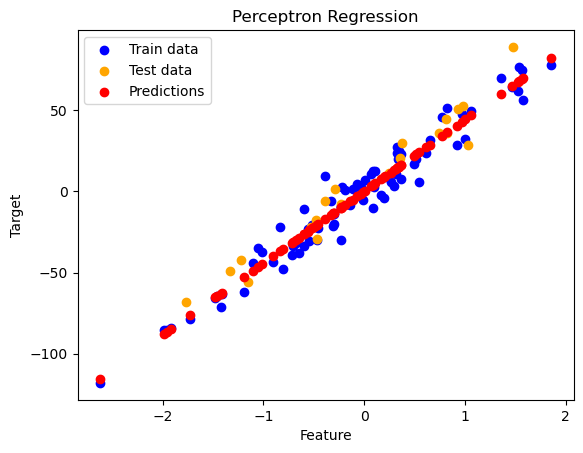

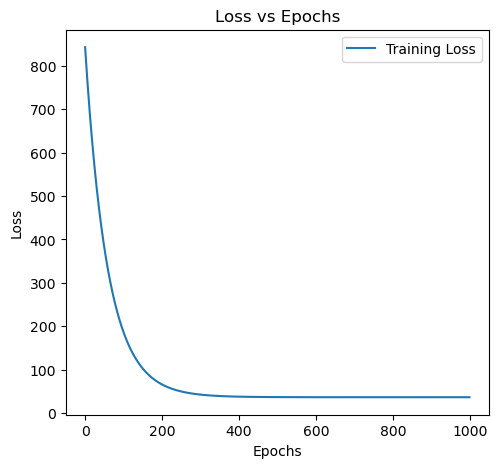

In [235]:
class Perceptron:
    def __init__(self, input_size=1, lr=0.01):
        self.input_size = input_size
        self.threshold = np.random.rand()
        self.w = np.random.rand(self.input_size, 1)
        self.lr = lr
        self.losses = []
        self.train_accuracies = []  # Track training accuracy
        self.test_accuracies = []  # Track test accuracy

    def forward(self, x):
        linear_output = np.dot(x, self.w) + self.threshold
        return linear_output  # No sigmoid for regression

    def compute_loss(self, y_true, y_pred):
        return 0.5 * np.mean((y_pred - y_true.reshape(-1, 1)) ** 2)

    def backward(self, x, y_true, y_pred):
        error = y_pred - y_true.reshape(-1, 1)
        self.w -= self.lr * np.dot(x.T, error) / len(y_true)
        self.threshold -= self.lr * np.sum(error) / len(y_true)

    def train(self, x_train, y_train, epochs=100):
        for epoch in range(epochs):
            y_pred_train = self.forward(x_train)
            train_loss = self.compute_loss(y_train, y_pred_train)
            self.losses.append(train_loss)
            self.backward(x_train, y_train, y_pred_train)

    def predict(self, x):
        return self.forward(x)

# Create dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train perceptron
epochs = 1000
perceptron = Perceptron(input_size=1, lr=0.01)
perceptron.train(X_train, y_train, epochs=epochs)

# Predictions
y_train_pred = perceptron.predict(X_train)
y_test_pred = perceptron.predict(X_test)

# Analyze results
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='orange', label='Test data')
plt.scatter(X_train, y_train_pred, color='red', label='Predictions')
plt.title('Perceptron Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(12, 5))
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(len(perceptron.losses)), perceptron.losses, label="Training Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
